In this case study we are going to analyze a dataset of Madrid Daily Weather, after analyzing data we will be answering few of questions. 

Daily weather conditions in Madrid from 1997-2015, including max/min/mean temperature, dew point, humidity, visibility, and wind speed, along with precipitation events, cloud cover, and wind direction.

# Recommended Analysis

**1. During the period in this sample, what % of days had some sort of precipitation event? What % were clear?** 

**2. Suppose you're planning a vacation to Madrid and hoping for the warmest temperature. Which month might you plan to travel?**

**3. On which date in the sample did Madrid see the fastest wind gust? What was the weather like on that day?**

**4. How does the average visibility (Km) compare for clear days vs. foggy days?**


In [1]:
#Importing essential and needful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading dataset

df = pd.read_csv('/kaggle/input/madrid-daily-weather/Madrid Daily Weather 1997-2015.csv')
df

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


In [3]:
#To get info in short manner

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [4]:
#To get the name of all columns

df.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

In [5]:
#To know the shape of df

df.shape

(6812, 23)

In [6]:
#To describe dataset

df.describe

<bound method NDFrame.describe of              CET  Max TemperatureC  Mean TemperatureC  Min TemperatureC  \
0     1997-01-01               7.0                4.0               2.0   
1     1997-01-02               7.0                3.0               0.0   
2     1997-01-03               5.0                3.0               2.0   
3     1997-01-04               7.0                3.0              -1.0   
4     1997-01-05               2.0                0.0              -1.0   
...          ...               ...                ...               ...   
6807  2015-12-27              14.0                7.0              -1.0   
6808  2015-12-28              15.0                8.0               2.0   
6809  2015-12-29              11.0                8.0               5.0   
6810  2015-12-30               9.0                8.0               6.0   
6811  2015-12-31              12.0               10.0               7.0   

      Dew PointC  MeanDew PointC  Min DewpointC  Max Humidity   M

In [7]:
#To get only top 5 records

df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [8]:
#To get bottom 5 records

df.tail()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256
6811,2015-12-31,12.0,10.0,7.0,10.0,8.0,7.0,100.0,90.0,70.0,...,31.0,8.0,2.0,14,6,NaN,0.25,6.0,Rain,313


In [9]:
#Checking the sum of all null values

df.isna().sum()

CET                               0
Max TemperatureC                  2
Mean TemperatureC                 3
Min TemperatureC                  2
Dew PointC                        2
MeanDew PointC                    2
Min DewpointC                     2
Max Humidity                      2
 Mean Humidity                    2
 Min Humidity                     2
 Max Sea Level PressurehPa        0
 Mean Sea Level PressurehPa       0
 Min Sea Level PressurehPa        0
 Max VisibilityKm               940
 Mean VisibilityKm              940
 Min VisibilitykM               940
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            3306
Precipitationmm                   0
 CloudCover                    1372
 Events                        5014
WindDirDegrees                    0
dtype: int64

In [10]:
#Converting datatype of "CET" column to datetime

df['CET'] = pd.to_datetime(df["CET"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CET                          6812 non-null   datetime64[ns]
 1   Max TemperatureC             6810 non-null   float64       
 2   Mean TemperatureC            6809 non-null   float64       
 3   Min TemperatureC             6810 non-null   float64       
 4   Dew PointC                   6810 non-null   float64       
 5   MeanDew PointC               6810 non-null   float64       
 6   Min DewpointC                6810 non-null   float64       
 7   Max Humidity                 6810 non-null   float64       
 8    Mean Humidity               6810 non-null   float64       
 9    Min Humidity                6810 non-null   float64       
 10   Max Sea Level PressurehPa   6812 non-null   int64         
 11   Mean Sea Level PressurehPa  6812 non-null 

In [11]:
#To check the datatype of each column

df.dtypes

CET                            datetime64[ns]
Max TemperatureC                      float64
Mean TemperatureC                     float64
Min TemperatureC                      float64
Dew PointC                            float64
MeanDew PointC                        float64
Min DewpointC                         float64
Max Humidity                          float64
 Mean Humidity                        float64
 Min Humidity                         float64
 Max Sea Level PressurehPa              int64
 Mean Sea Level PressurehPa             int64
 Min Sea Level PressurehPa              int64
 Max VisibilityKm                     float64
 Mean VisibilityKm                    float64
 Min VisibilitykM                     float64
 Max Wind SpeedKm/h                     int64
 Mean Wind SpeedKm/h                    int64
 Max Gust SpeedKm/h                   float64
Precipitationmm                       float64
 CloudCover                           float64
 Events                           

In [12]:
#To get the length of df

len(df)

6812

In [13]:
#As we can see that there are many empty cells in "Event" column hence going to fill all those records by word "Clear day"

df[" Events"] = df[" Events"].fillna("clear day")
df

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.00,6.0,clear day,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.00,2.0,clear day,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,clear day,256


We can see in above df, clear day is now there.

In [14]:
#To get/extract "year" from "CET" column

df['year'] = pd.to_datetime(df['CET'], infer_datetime_format = True).dt.year

/tmp/ipykernel_18/788295669.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['year'] = pd.to_datetime(df['CET'], infer_datetime_format = True).dt.year


In [15]:
#Now, we can see that "year" column must has been added

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CET                          6812 non-null   datetime64[ns]
 1   Max TemperatureC             6810 non-null   float64       
 2   Mean TemperatureC            6809 non-null   float64       
 3   Min TemperatureC             6810 non-null   float64       
 4   Dew PointC                   6810 non-null   float64       
 5   MeanDew PointC               6810 non-null   float64       
 6   Min DewpointC                6810 non-null   float64       
 7   Max Humidity                 6810 non-null   float64       
 8    Mean Humidity               6810 non-null   float64       
 9    Min Humidity                6810 non-null   float64       
 10   Max Sea Level PressurehPa   6812 non-null   int64         
 11   Mean Sea Level PressurehPa  6812 non-null 

**Now, after analyse it basically, let's jump to questions.**

# 1. During the time period in this sample, what % of days had some sort of precipitation event? What % were clear?

In [16]:
#We have to calculate precipitation days and clear days.
#So, basic formula is "Precipitationmm = (Precipitationmm occurance/Total occurance)*100"
#Therefore, calculating precipitation_days

precipitation_days = (245/df['Precipitationmm'].count())*100
precipitation_days

3.596594245449207

In [17]:
#Same as above, calculating clear_precipitationmm_days

clear_precipitationmm_days = (6567/df['Precipitationmm'].count())*100
clear_precipitationmm_days

96.4034057545508

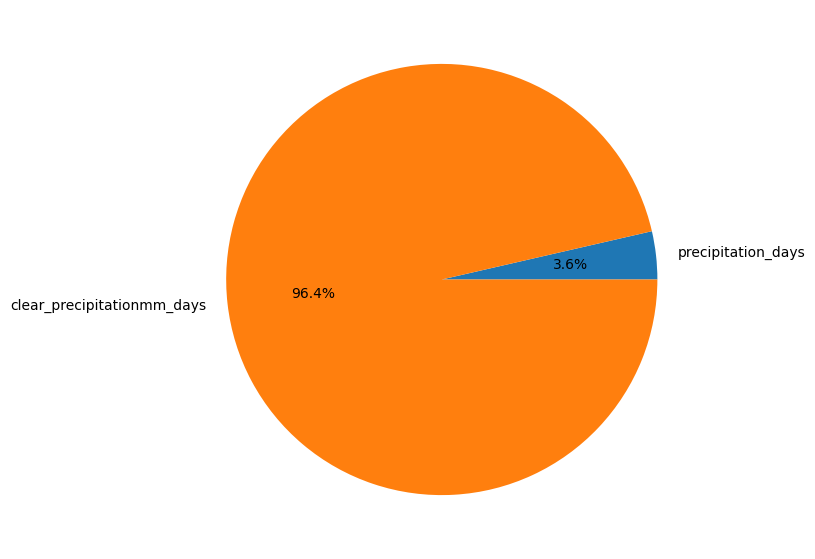

In [18]:
#Better presenatation can be seen through pie plot, let's draw a pie chart

precipitationmm_percentage = ['precipitation_days', 'clear_precipitationmm_days']
data = [3.596, 96.403]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = precipitationmm_percentage,autopct='%1.1f%%')
plt.show()

Above graph is clearly showing the contribution of both type of days.

Precipitationmm Days - 3.6%,
Clear Precipitationmm Days - 96.4%

# 2. Suppose you're planning a vacation to Madrid and hoping for the warmest temperature. Which month might you plan to travel?

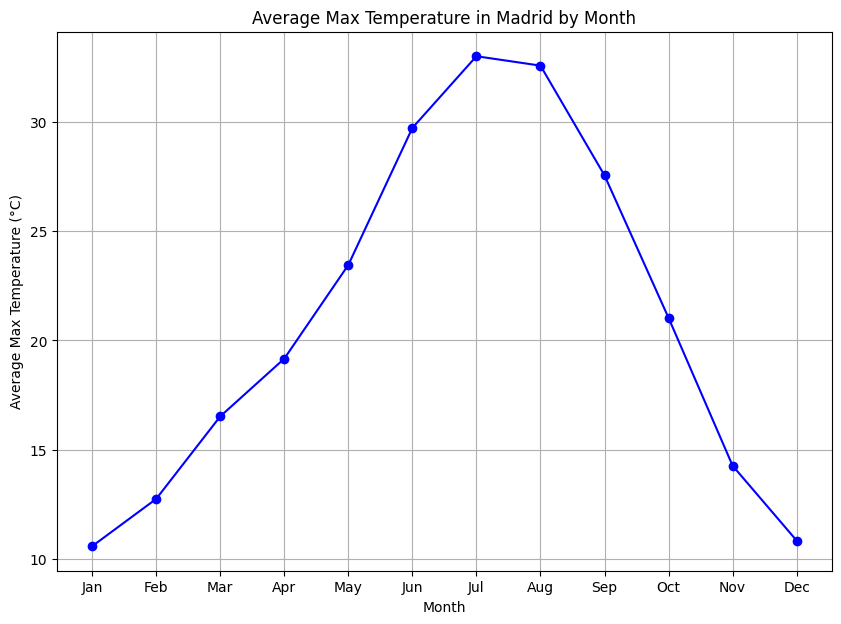

In [19]:
df['CET'] = pd.to_datetime(df['CET'])
# Extracting the month from the date
df['Month'] = df['CET'].dt.month

# Grouping by month and calculating the average maximum temperature
average_max_temp = df.groupby('Month')['Max TemperatureC'].mean()

plt.figure(figsize=(10, 7))
plt.plot(average_max_temp, marker='o', linestyle='-', color='b')
plt.title('Average Max Temperature in Madrid by Month')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [20]:
average_max_temp.sort_values(ascending = True)

Month
1     10.588551
12    10.845501
2     12.752363
11    14.270175
3     16.526882
4     19.168519
10    21.032258
5     23.455631
9     27.550877
6     29.723214
8     32.572680
7     33.003396
Name: Max TemperatureC, dtype: float64

Through above graph, temperature range can be seen for different month clearly. Thus, Jan month is with lowest temp. while July month is the month which shows highest temp.

# 3. On which date in the sample did Madrid see the fastest wind gust? What was the weather like on that day?

In [21]:
#Finding the record with fastest wind gust, also sorting it in order

gust_analysis = df.sort_values(" Max Gust SpeedKm/h",ascending = False)
gust_analysis.head(1)

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,year,Month
309,1997-11-06,16.0,11.0,6.0,12.0,5.0,1.0,88.0,70.0,54.0,...,5.0,58,27,103.0,0.0,5.0,Rain,224,1997,11


on 6th Nov, 1997 date madrid saw the fastest wind gust. On that day, max temp. was 16 degree and lowest temp. was 6 degree. Max and Min wind speed km/hr was 58 and 27 respectively.

# 4. How does the average visibility (Km) compare for clear days vs. foggy days?

In [22]:
#Making group of data based on the 'Events' column

grouped_data = df.groupby(' Events')[' Mean VisibilityKm'].mean().sort_values(ascending = False).round(2)
grouped_data

 Events
Rain-Hail                 14.00
clear day                 12.64
Thunderstorm              10.82
Rain-Thunderstorm         10.53
Rain                      10.21
Rain-Hail-Thunderstorm    10.14
Tornado                   10.00
Rain-Snow                  9.73
Snow                       9.29
Fog-Rain-Thunderstorm      8.00
Fog-Rain                   7.28
Fog-Thunderstorm           7.00
Rain-Snow-Thunderstorm     7.00
Fog                        6.54
Fog-Rain-Snow              5.00
Fog-Snow                   4.50
Name:  Mean VisibilityKm, dtype: float64

Text(0.5, 1.0, 'Visibility vs Clear day')

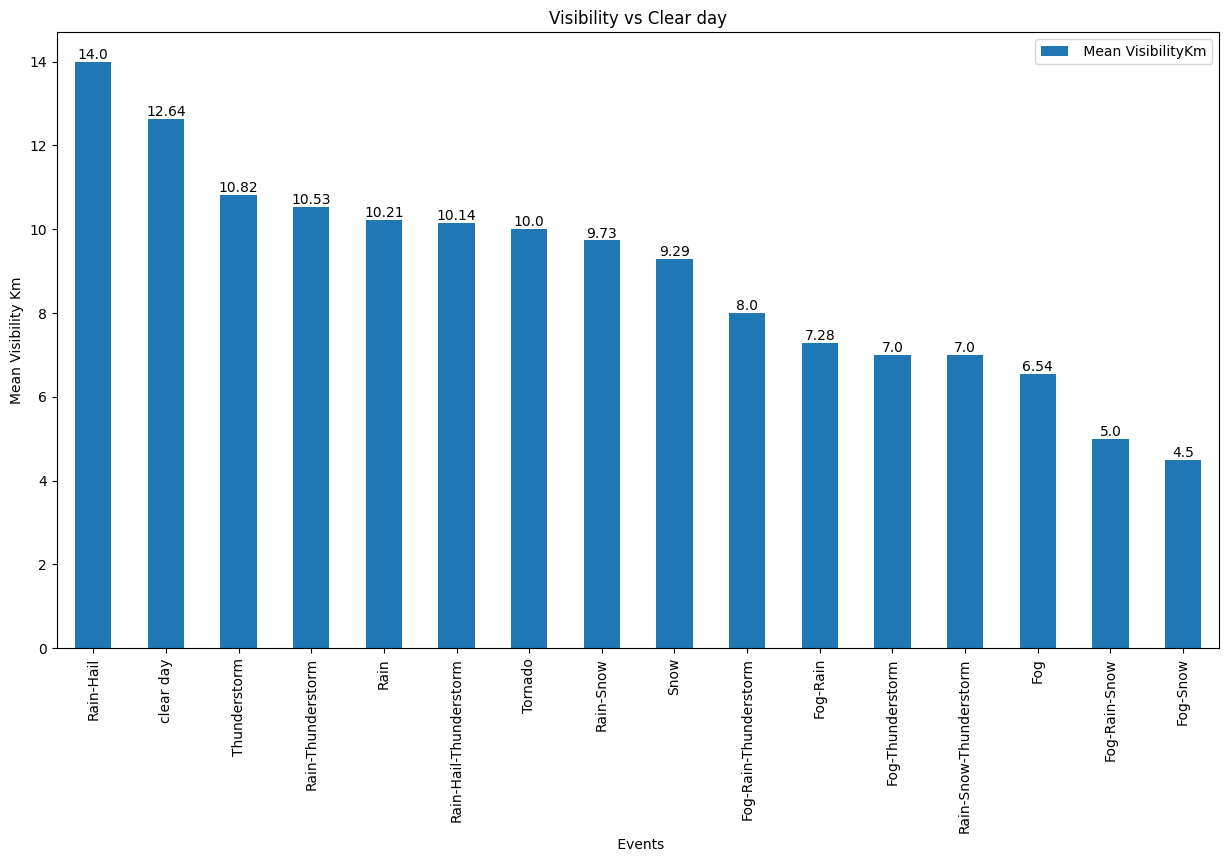

In [23]:
#Creating a plot for better understanding

grouped_data.head(30).to_frame().plot(kind='bar',figsize=(15,8))
for i, v in enumerate(grouped_data):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('Mean Visibility Km')
plt.title('Visibility vs Clear day')

From above graph, it can be said that average visibility in clear days is 24.64 while in foggy days it is 8.15.